In [2]:
## Loading the Dataset

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True)

In [3]:
df= pd.read_csv(r'C:\Users\akshita\Downloads\Proj1 (1) (1).csv')
# df.head()
df.shape
# list(df)

(1100, 14)

In [4]:
df.drop(columns = ['Sample ID','Sl No','Age'], axis = 1 , inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1100 non-null   object 
 1   inter canine distance intraoral  1100 non-null   float64
 2   intercanine distance casts       1100 non-null   float64
 3   right canine width intraoral     1100 non-null   float64
 4   right canine width casts         1100 non-null   float64
 5   left canine width intraoral      1100 non-null   float64
 6   left canine width casts          1100 non-null   float64
 7   right canine index intra oral    1100 non-null   float64
 8   right canine index casts         1100 non-null   float64
 9   left canine index intraoral      1100 non-null   float64
 10  left canine index casts          1100 non-null   float64
dtypes: float64(10), object(1)
memory usage: 94.7+ KB


In [6]:
df.dtypes

Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [7]:
df.isnull().sum().sort_values(ascending=False)

Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

In [8]:
print(df['Gender'].unique())

['Female' 'Male']


In [9]:
print(df['Gender'].value_counts())

Female    550
Male      550
Name: Gender, dtype: int64


In [10]:
label_encoder  = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [12]:
df.count()

Gender                             1100
inter canine distance intraoral    1100
intercanine distance casts         1100
right canine width intraoral       1100
right canine width casts           1100
left canine width intraoral        1100
left canine width casts            1100
right canine index intra oral      1100
right canine index casts           1100
left canine index intraoral        1100
left canine index casts            1100
dtype: int64

In [13]:
df = df.drop_duplicates()
df.count()

Gender                             1077
inter canine distance intraoral    1077
intercanine distance casts         1077
right canine width intraoral       1077
right canine width casts           1077
left canine width intraoral        1077
left canine width casts            1077
right canine index intra oral      1077
right canine index casts           1077
left canine index intraoral        1077
left canine index casts            1077
dtype: int64

In [14]:
df.isnull().sum()

Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

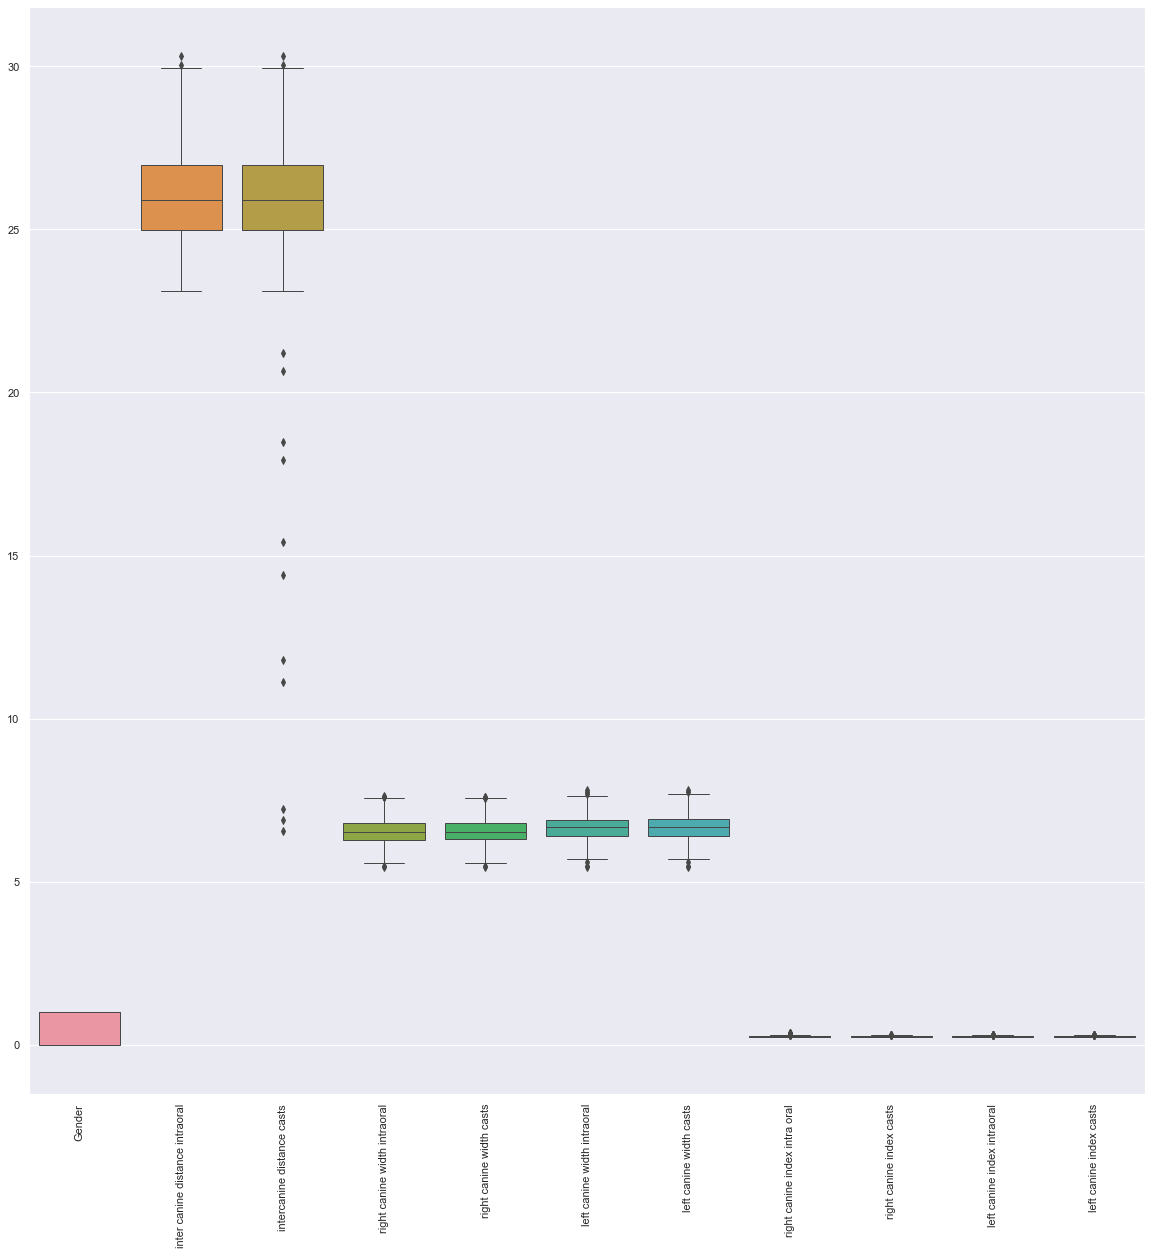

In [15]:
#Boxplot to find out outliers
fig = plt.figure(figsize =(20, 20))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
#Define outliers
def outliers (df, ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [17]:
#Removing Outlayers
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [18]:
df.shape

(1077, 11)

In [19]:
index_list = []
for feature in [
 'Gender',
 'inter canine distance intraoral',
 'intercanine distance casts',
 'right canine width intraoral',
 'right canine width casts',
 'left canine width intraoral',
 'left canine width casts',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral',
 'left canine index casts']:
    index_list.extend(outliers(df , feature))

In [20]:
df1 = remove(df,index_list)

In [21]:
df1.shape

(1031, 11)

In [22]:
df1.corr()

,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
Gender,1.000000,0.343996,0.343686,0.544627,0.544754,0.620852,0.623938,0.272879,0.276683,0.370142,0.373046
inter canine distance intraoral,0.343996,1.000000,0.999965,0.576517,0.578644,0.619467,0.617933,-0.356836,-0.351572,-0.345069,-0.338860
intercanine distance casts,0.343686,0.999965,1.000000,0.577132,0.579241,0.620687,0.619138,-0.356099,-0.350807,-0.343581,-0.337370
right canine width intraoral,0.544627,0.576517,0.577132,1.000000,0.999808,0.935264,0.934234,0.551711,0.559688,0.484227,0.488886
right canine width casts,0.544754,0.578644,0.579241,0.999808,1.000000,0.936617,0.935518,0.549504,0.557648,0.483530,0.488224
left canine width intraoral,0.620852,0.619467,0.620687,0.935264,0.936617,1.000000,0.999700,0.439705,0.447737,0.520279,0.525577
left canine width casts,0.623938,0.617933,0.619138,0.934234,0.935518,0.999700,1.000000,0.440317,0.448134,0.521811,0.527211
right canine index intra oral,0.272879,-0.356836,-0.356099,0.551711,0.549504,0.439705,0.440317,1.000000,0.995629,0.906518,0.905598
right canine index casts,0.276683,-0.351572,-0.350807,0.559688,0.557648,0.447737,0.448134,0.995629,1.000000,0.910535,0.909692
left canine index intraoral,0.370142,-0.345069,-0.343581,0.484227,0.483530,0.520279,0.521811,0.906518,0.910535,1.000000,0.999206


In [23]:
#EDA Graphs 
# Histograms
# bar plots
# count plots

# Scatter plot?

# pairplot
# heatmap - corrleation

In [24]:
#Assigning x and y 
x=df1.drop('Gender', axis=1)
y=df1['Gender']

In [25]:
# Standardization
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_new=SS.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((824, 10), (207, 10), (824,), (207,))

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import catboost as ctb

In [28]:
from sklearn.linear_model import LogisticRegression
Lg=LogisticRegression()
Lg.fit(x_train, y_train)

LogisticRegression()

In [30]:
y_pred_train=Lg.predict(x_train)
y_pred_test=Lg.predict(x_test)

In [31]:
train_acc=accuracy_score(y_train, y_pred_train)
print("Logestic Regression Training accuracy",train_acc.round(2),'%')

test_acc=accuracy_score(y_test, y_pred_test)
print("Logestic Regression Test accuracy",test_acc.round(2),'%')

Logestic Regression Training accuracy 0.81 %
Logestic Regression Test accuracy 0.78 %


In [32]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='gini', max_depth=6)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [33]:
y_pred_train=DT.predict(x_train)
y_pred_test=DT.predict(x_test)

In [34]:
train_acc=accuracy_score(y_train, y_pred_train)
print("Decission Tree Training accuracy",train_acc.round(2),'%')

test_acc=accuracy_score(y_test, y_pred_test)
print("Decission Tree Test accuracy",test_acc.round(2),'%')

Decission Tree Training accuracy 0.9 %
Decission Tree Test accuracy 0.79 %
